In [21]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap

In [3]:
import os

df = pd.DataFrame()

# First collect the documents:
print("Reading weather data files")
path = './statsdb/'

for (path, dirlist, files) in os.walk(path):
    print(f'Found directory: {path}')
    
    for file in files:
        if file[0] not in '.abcd':  # Don't process hidden files
            continue

        df_temp = pd.read_csv(f'{path}/{file}')
        iceberg = file[:file.find('.')]
        df_temp['iceberg'] = iceberg
        df = df.append(df_temp, ignore_index=True)
        print(f'{file} imported, ({len(df_temp)} lines)')
            
print(f'{len(files)} weather files read. Total number of rows = {len(df)}')

Reading weather data files
Found directory: ./statsdb/
a01.csv imported, (100 lines)
a02.csv imported, (92 lines)
a03.csv imported, (4 lines)
a04.csv imported, (1 lines)
a05.csv imported, (8 lines)
a06.csv imported, (3 lines)
a07.csv imported, (1 lines)
a08.csv imported, (3 lines)
a09.csv imported, (1 lines)
a10.csv imported, (1 lines)
a11.csv imported, (2 lines)
a12.csv imported, (4 lines)
a13.csv imported, (40 lines)
a14.csv imported, (2 lines)
a15.csv imported, (28 lines)
a16.csv imported, (43 lines)
a17.csv imported, (4 lines)
a19.csv imported, (29 lines)
a20.csv imported, (38 lines)
a20a.csv imported, (202 lines)
a20b.csv imported, (232 lines)
a21.csv imported, (33 lines)
a21a.csv imported, (49 lines)
a22.csv imported, (1092 lines)
a22a.csv imported, (5000 lines)
a22b.csv imported, (2260 lines)
a22c.csv imported, (1128 lines)
a23.csv imported, (317 lines)
a23b.csv imported, (2838 lines)
a24.csv imported, (402 lines)
a24a.csv imported, (9 lines)
a24b.csv imported, (9 lines)
a24c.cs

In [4]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,iceberg
0,1978204,0,0.000,257,-60.219,-48.483,0,10.0,0.0,a01
1,1978205,1,0.331,257,-60.218,-48.488,0,10.0,0.0,a01
2,1978206,1,0.326,257,-60.217,-48.493,0,10.0,0.0,a01
3,1978207,1,0.332,257,-60.215,-48.498,0,10.0,0.0,a01
4,1978208,1,0.326,257,-60.214,-48.504,0,10.0,0.0,a01


In [49]:
def ShowPaths(df_icebergs):
    plt.figure(figsize=(8,8))
    m = Basemap(projection='aeqd', resolution='l', lat_0=-90, lon_0=-138, width=12000000, height=12000000)

    m.drawmeridians(np.arange(0,360,15))
    m.drawparallels(np.arange(-90,90,10), labels=[1,0,0,1])

    x, y = m(df_icebergs['lon'].values, df_icebergs['lat'].values)
    m.scatter(x, y, 3, marker='.', color='r')

    df_lastpos = df_icebergs.groupby(['iceberg'])['lon', 'lat'].last()
    x, y = m(df_lastpos['lon'].values, df_lastpos['lat'].values)

    m.scatter(x, y, 20, marker='o', color='yellow')
    m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


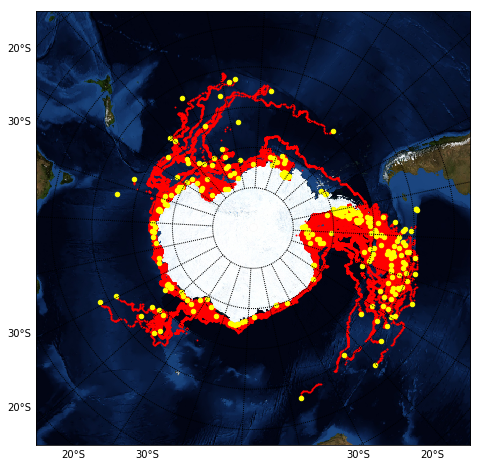

In [15]:
ShowPaths(df)

In [33]:
# Get a list of of all the icebergs that still exist
dfCurrent = df[df['date'] == 2017151]
currentList = dfCurrent['iceberg'].values
currentList

array(['a57a', 'a57b', 'a61', 'a63', 'a64', 'b09b', 'b09d', 'b09f',
       'b09g', 'b09h', 'b09i', 'b15aa', 'b15ab', 'b15t', 'b15z', 'b16',
       'b22a', 'b28', 'b29', 'b30', 'b31', 'b35', 'b37', 'b38', 'b39',
       'b40', 'c15', 'c18b', 'c21b', 'c24', 'c28b', 'c29', 'c30', 'c31',
       'c32', 'c33'], dtype=object)

In [37]:
# Filter the original list by this
dfCurrent = df[df['iceberg'].isin(currentList)]
dfCurrent

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,iceberg
55748,2016004,0,0.000,4,-71.466,-59.067,1,45298.39,-0.1270,a57a
55749,2016005,1,0.000,4,-71.466,-59.067,0,45310.61,-0.0798,a57a
55750,2016006,1,0.000,4,-71.466,-59.067,0,45322.83,-0.0255,a57a
55751,2016007,1,14.416,4,-71.524,-58.701,0,45335.06,0.0272,a57a
55752,2016008,1,8.643,4,-71.480,-58.903,0,45347.28,0.0694,a57a
55753,2016009,1,6.598,4,-71.451,-59.067,0,45359.51,0.1121,a57a
55754,2016010,1,0.000,4,-71.451,-59.067,0,45371.73,0.0327,a57a
55755,2016011,1,0.000,4,-71.451,-59.067,0,45383.96,0.0346,a57a
55756,2016012,1,0.000,4,-71.451,-59.067,0,45396.18,0.0091,a57a
55757,2016013,1,4.473,5,-71.423,-59.156,0,45408.40,-0.0289,a57a


36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


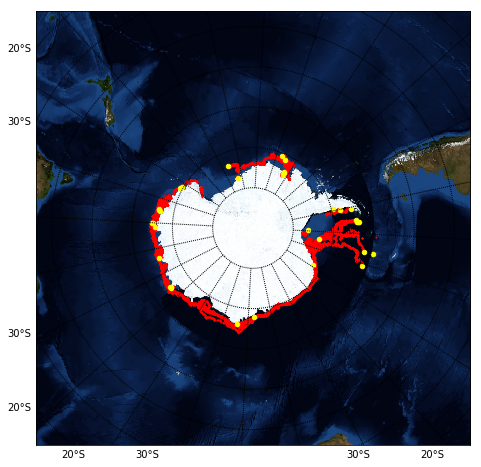

In [48]:
ShowPaths(dfCurrent)

In [44]:
dfCurrent.groupby('iceberg')['lat', 'lon'].count()

,lat,lon
iceberg,,
a57a,498,498
a57b,501,501
a61,2629,2629
a63,1634,1634
a64,1071,1071
b09b,9227,9227
b09d,2214,2214
b09f,2102,2102
b09g,1836,1836
